#**Assignment – Model Selection**

In [1]:
import pandas as pd             # python library to manipulate data. pandas is acronym of panneled data
import numpy as np              # numerical python . python library for arithmetical operations

#python library for data visualisation

import matplotlib.pyplot as plt # 2D ploting library
import seaborn as sns           # baseon matplotlib provides a high-level interface for drawing attractive and informative statistical graphics

**1. Load the dataset into python environment**

In [2]:
data = pd.read_csv('/content/drive/MyDrive/titanic_dataset .csv')

Display first 5 observations in each column of the data set

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Check the DataTypes

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Shape ornumber of observations and columns



In [5]:
data.shape

(891, 12)

**2. Do all the necessary pre-processing steps**

Pre Processing may include the following steps

Step 1 : Check out the missing values

Step 2 : Check out the outliers

Step 3 : See the Categorical Values

Step 4 : Splitting the data-set into Training and Test Set

Step 5 : Feature Scaling

Check for missing values

In [6]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Percentage of null values

In [7]:
print('Cabin',np.round(data['Cabin'].isnull().mean(),2))

Cabin 0.77


In [8]:
# 77% of value are missing from cabin column and hence the column itself is not relevant

data.drop(columns=['Cabin'],axis=1,inplace=True)

Missing values handling comes under Feature Engineering

In [9]:
# since there are numeric as well as categorical values either mean or median can be used to fill missing values of numeric
# and mode may be used to fill object type


Features with null values

In [10]:
features_with_na=[features for features in data.columns if data[features].isna().sum()>=1]

In [11]:
features_with_na

['Age', 'Embarked']

Plot the histogram to see the distribution curve of data

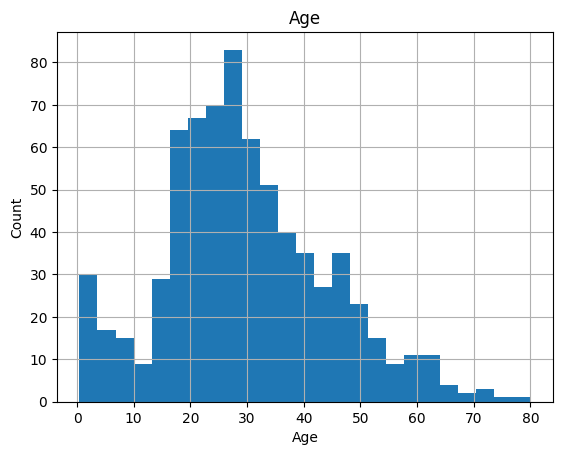

In [12]:
freqgraph=data.select_dtypes(include=['float'])
freqgraph['Age'].hist(bins=25)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age')
plt.show()

Finding Skewness value to know distribution type

In [13]:
print('Skewness value of Age : ',data['Age'].skew())

Skewness value of Age :  0.38910778230082704


In [14]:
# #the skewness value between -1/2 and +1/2 = approximately symmetric distribution and hence we can use mean to replace the missing values

using mean to replace the missing values

In [15]:
data['Age']=data['Age'].fillna(data['Age'].mean())

Replace missing values of'Embarked' column with most repeating city

In [16]:
data['Embarked']=data['Embarked'].fillna(data['Embarked'].mode()[0])

Finding the columns in the dataset with number of missing values

In [17]:
data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [18]:
# replaced all the missing values in the data set

In [19]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

In [20]:
#Age can be converted into int than float type

data['Age']=data['Age'].astype('int')

data['Age'].dtype

dtype('int64')

Check for Duplicales

In [21]:
data.duplicated().sum()

0

In [22]:
data['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [23]:
# 678 passengers were travelling alone
# 118 passengares travel with some one along them
# 80 passengares with 2 people etc

Find statitical summary

In [24]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.544332,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.013778,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Filtering out numerical features

In [25]:
numerical_features=[features for features in data.columns if data[features].dtypes !='O']

#filter and save into new list if datatype is not object

numerical_features

['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

Visualisation

Out of891 people 62 percent died in the accident


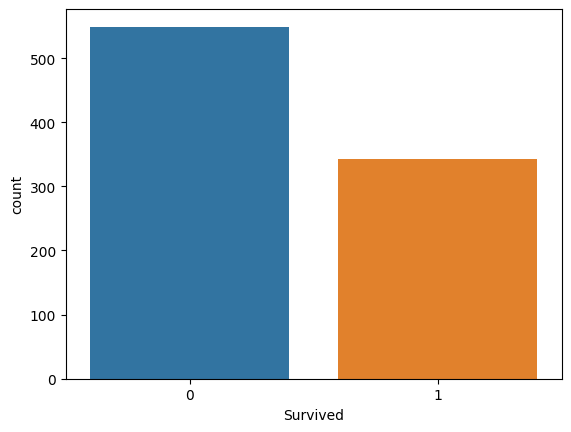

In [26]:
sns.countplot(x='Survived',data=data)

death_percent=round((data['Survived'].value_counts().values[0]/891)*100)
print('Out of891 people {} percent died in the accident'.format(death_percent))

To check for Outliers drawing Boxplot for numerical features

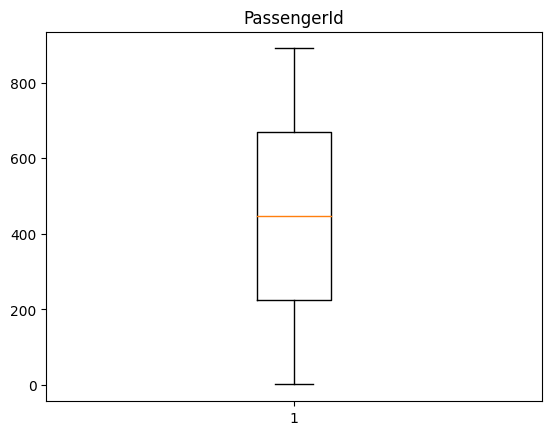

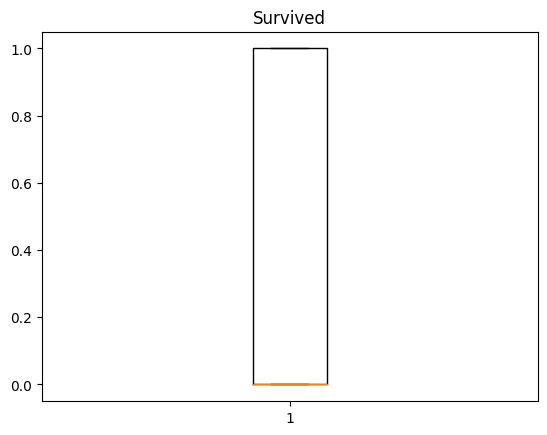

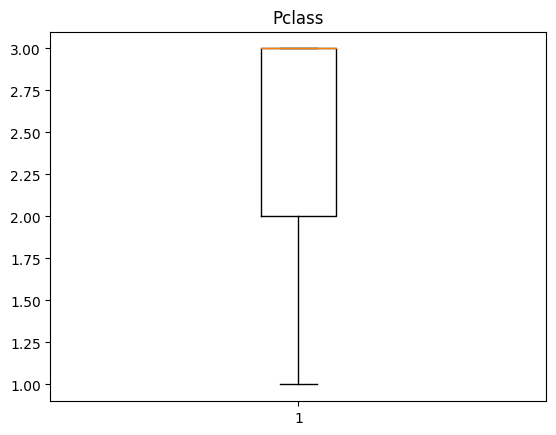

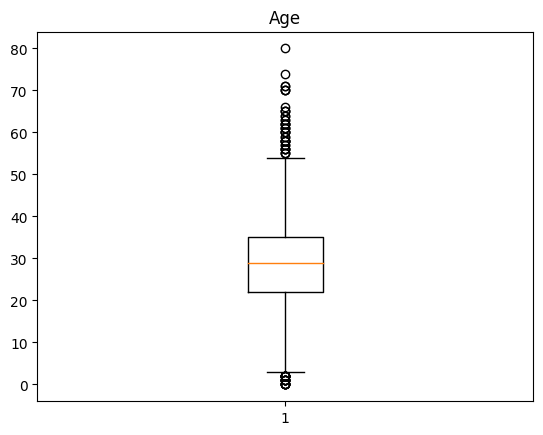

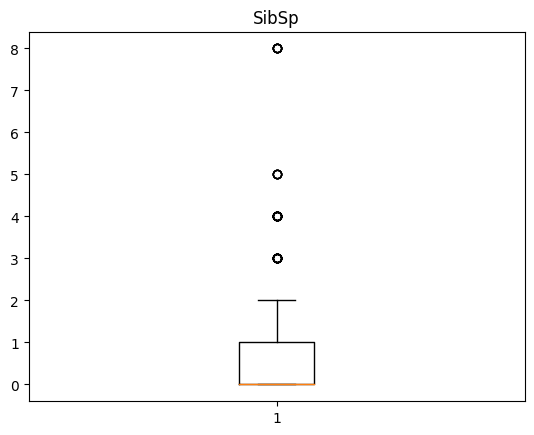

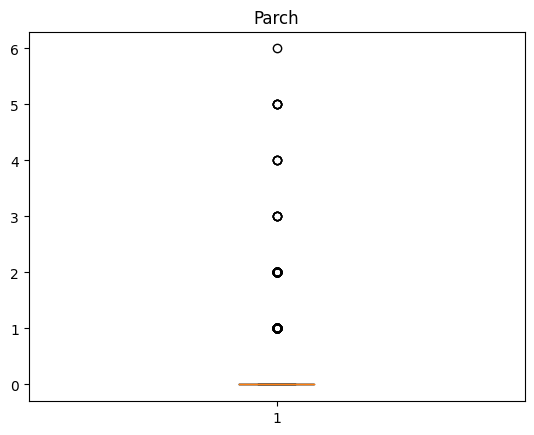

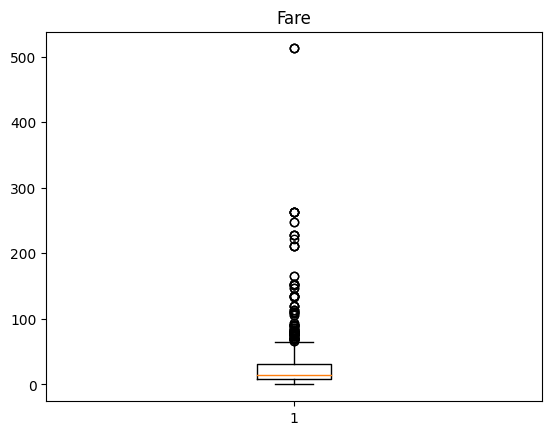

In [27]:
for feature in numerical_features:
  plt.figure()
  plt.boxplot(data[feature])
  plt.title(feature)

Outliers are handled during Feature Engineering

In [28]:
outliers=['Age', 'SibSp', 'Parch', 'Fare']

In [33]:
# Most of thepeopletravelled were in the agerange of 20 to 40

print('People with Age in between 60 and 70 are: ',data[(data['Age']>60)&(data['Age']<70)].shape[0])
print('People with Age in between 70 and 75 are: ',data[(data['Age']>=70)&(data['Age']<=75)].shape[0])
print('People with Age greater than 75 are: ',data[data['Age']>75].shape[0])

People with Age in between 60 and 70 are:  15
People with Age in between 70 and 75 are:  6
People with Age greater than 75 are:  1


In [34]:
# as we already checked age is normally distributed
# if the data is following normal distribution, anything beyond 3SD - mean +3SD can e considered as an outlier

data=data[data['Age']<(data['Age'].mean()+3*data['Age'].std())]

data.shape

(884, 11)

In [35]:
data['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8])

In [36]:
data['Parch'].unique()

array([0, 1, 2, 5, 3, 4, 6])

In [ ]:
# Lets leave SibSp andParch as it is

In [37]:
print('Skewness value of Fare : ',data['Fare'].skew())

Skewness value of Fare :  4.77869718428245


In [39]:
# Lets handle outliers of  'Fare' whichare highly skewed outlier
# More outlairs are seen above the limit

Q1 = data['Fare'].quantile(0.25)
Q3 = data['Fare'].quantile(0.75)
print('\nFare\n')
print('Q1=',Q1)
print('Q3=',Q3)
IQR=Q3-Q1
print('IQR=',IQR)
up_lim=Q3+1.5*IQR
print('Upper limit=',up_lim)
data['Fare']=np.where(data['Fare']>up_lim,up_lim,data['Fare'])


Fare

Q1= 7.9177
Q3= 31.0
IQR= 23.0823
Upper limit= 65.62344999999999


Filtering out Categorical features

In [40]:
categorical_features=[features for features in data.columns if data[features].dtypes =='O']

#filter and save into new list if datatype is object

categorical_features

['Name', 'Sex', 'Ticket', 'Embarked']

In [41]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [42]:
data.shape

(884, 11)

Splitting the data-set into Feature Training,Testing and Target

In [53]:
# 'Survived'  is the target column in dataset

X=data.drop(['PassengerId','Name','Ticket','Survived','Fare'],axis=1) #features in x
y=data['Survived'] #target in y

One Hot Encoding

In [54]:
categorical_features

['Name', 'Sex', 'Ticket', 'Embarked']

In [55]:
X=pd.get_dummies(X)

In [56]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

X_train

,Pclass,Age,SibSp,Parch,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
406,3,51,0,0,0,1,0,0,1
436,3,21,2,2,1,0,0,0,1
362,3,45,0,1,1,0,1,0,0
357,2,38,0,0,1,0,0,0,1
81,3,29,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...
107,3,29,0,0,0,1,0,0,1
272,2,41,0,1,1,0,0,0,1
867,1,31,0,0,0,1,0,0,1
437,2,24,2,3,1,0,0,0,1


**3. Create kNN and SVM models**

k Nearest Neighbor

In [58]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
metric = []
neighbors = np.arange(3,15) # taking neighbor values of ranks from 3 to 14

for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors = k, metric = 'minkowski',p=2)
    classifier.fit(X_train,y_train)
    y_pred_knn = classifier.predict(X_test)
    acc = accuracy_score(y_test,y_pred_knn) # storing the accuracy score
    metric.append(acc)                      # storing the accuracy score of each neighbor value to metric

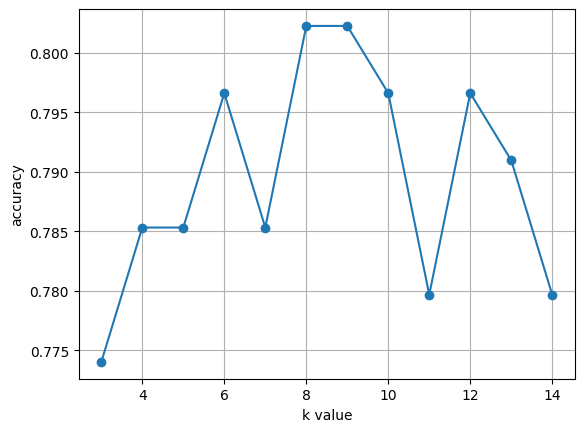

In [59]:
plt.plot(neighbors,metric,'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')
plt.grid()

In [61]:
# k=1 has more accurcy  from the above graph fit it with the neighbor value

for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors = 1, metric = 'minkowski',p=2)
    classifier.fit(X_train,y_train)
    y_pred_knn = classifier.predict(X_test)

In [62]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
print('Acuracy=',accuracy_score(y_test,y_pred_knn))
print('Precision=',precision_score(y_test,y_pred_knn))
print('Recall=',recall_score(y_test,y_pred_knn))
print('F1 score=',f1_score(y_test,y_pred_knn))

Acuracy= 0.7175141242937854
Precision= 0.6309523809523809
Recall= 0.7361111111111112
F1 score= 0.6794871794871795


SVM model

In [63]:
from sklearn.svm import SVC
svmclf=SVC(kernel='linear')
svmclf.fit(X_train,y_train)

SVC(kernel='linear')

In [64]:
#predict

y_pred=svmclf.predict(X_test)

from sklearn.metrics import accuracy_score,confusion_matrix
print('Accuracy is : ',accuracy_score(y_test,y_pred))

Accuracy is :  0.7740112994350282


**SVM Model gives more auracy than kNN ie 77%**

**4. Do k-fold and stratified stratified k-fold cross validation techniques and find the
average accuracy score of the models**

K Fold Cross Validation

In [65]:
from sklearn.model_selection import KFold

kfold_validator=KFold(10)

for train_index,test_index in kfold_validator.split(X,y):
  print('Training Index: ',train_index)
  print('Testing Index: ',test_index)

Training Index:  [ 89  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106
 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124
 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142
 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160
 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178
 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196
 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214
 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232
 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250
 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268
 269 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286
 287 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304
 305 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322
 323 324 325 326 327 328 329 330 3

In [67]:
from sklearn.model_selection import cross_val_score

cv_result = cross_val_score(svmclf,X,y,cv=kfold_validator)
cv_result

array([0.80898876, 0.82022472, 0.75280899, 0.83146067, 0.77272727,
       0.79545455, 0.73863636, 0.73863636, 0.84090909, 0.76136364])

In [68]:
np.mean(cv_result)

0.7861210418794689

Stratified Cross validation

In [69]:
from sklearn.model_selection import StratifiedKFold

skfold_validator = StratifiedKFold(n_splits=10)

In [70]:
for train_index,test_index in skfold_validator.split(X,y):
    print('Training Index: ',train_index)
    print('Testing Index: ',test_index)

Training Index:  [ 81  82  84  85  88  94  95  96  97  98  99 100 101 102 103 104 105 106
 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124
 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142
 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160
 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178
 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196
 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214
 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232
 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250
 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268
 269 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286
 287 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304
 305 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322
 323 324 325 326 327 328 329 330 3

In [71]:
skcv_result = cross_val_score(svmclf,X,y,cv=skfold_validator)
skcv_result

array([0.82022472, 0.78651685, 0.76404494, 0.84269663, 0.79545455,
       0.77272727, 0.76136364, 0.75      , 0.80681818, 0.76136364])

In [72]:
np.mean(skcv_result)

0.7861210418794689

**Bothh the cross validation methods are not used togethr
for balnced dataset K fold and for unbalanced dataset stratified K fold are used**

**Average accuracy score is 78%**